<a href="https://colab.research.google.com/github/roniel06/python_ml_exc/blob/main/Advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  0. Presentación

### Roniel Polanco
### Practica Individual 1, modelo de prediccion
### Regresion Lineal

# 1. Imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from math import sqrt

# 2. Data Gathering

In [ ]:

dataset=pd.read_csv('https://pastebin.com/raw/JFACpGgf')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dataset.shape

(200, 4)

## 3. Data Wrangling/CLEANING

In [ ]:

print(dataset.isna().any()) # No missing values
dataset.dtypes # All are numeric column. Not categorical col is present

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#4. Data visualization

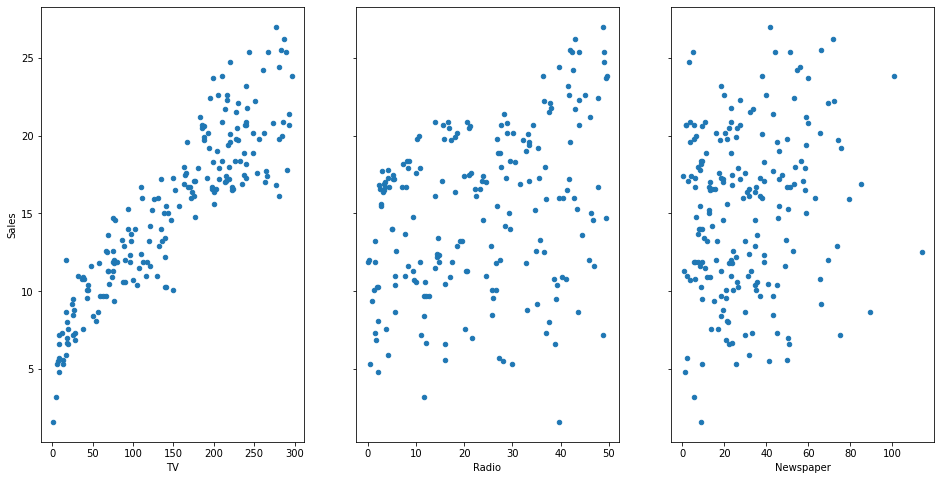

In [ ]:
fig,axs= plt.subplots(1,3,sharey=True)
dataset.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
dataset.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
dataset.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

# 5. FEATURES SELECTION

In [ ]:

feature_x=['TV','Radio','Newspaper']
X=dataset[feature_x]
y=dataset.Sales
print(X,y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


# 6. Data Splitting Train Test

In [ ]:
xtrain,xtest, ytrain, ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=30)
print(xtrain.shape)
print(xtest.shape)

(140, 3)
(60, 3)


# 7. Training & Predictions

Linear Model for variable #0
6.832604053989313 [0.05560761]
MSE: 5.686866311580136
STD: 2.3847151426491457
r2: 0.8041810851835126

Linear Model for variable #1
12.372681911531405 [0.11078268]
MSE: 25.319422999265573
STD: 5.031840915536338
r2: 0.12816274133263839

Linear Model for variable #2
13.713035670627983 [0.03672209]
MSE: 29.43323394655041
STD: 5.425240450574556
r2: -0.013490315257973062



,TV,Newspaper,Radio
0,50,50,50


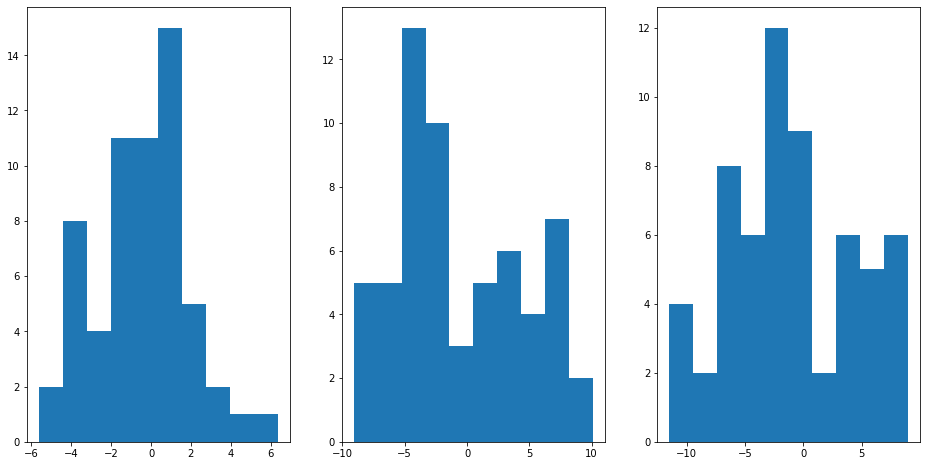

In [ ]:


lm = []
fig, axs = plt.subplots(1,3)
fig.set_size_inches(16,8)
for i in range(X.shape[1]):
  print("Linear Model for variable #{}".format(i))
  lm.append(LinearRegression())
  lm[i].fit(xtrain.iloc[:, [i]], ytrain)
  y_pred = lm[i].predict(xtest.iloc[:, [i]])
  print(lm[i].intercept_, lm[i].coef_)
  print("MSE:", mean_squared_error(ytest,y_pred))
  print("STD:", sqrt(mean_squared_error(ytest,y_pred)))
  print("r2:", lm[i].score(xtest.iloc[:, [i]], ytest))

  sqr_error = (y_pred - ytest)


  axs[i].hist(sqr_error)

  print()

#Model Prediction
x_new=pd.DataFrame({'TV':[50],
                   'Newspaper':[50],
                   'Radio':[50]})
x_new.head()

Linear Model for variable #0
4.800619876786589 [0.05490107 0.09830077]
MSE: 2.341958208661954
STD: 1.5303457807508583
r2: 0.9193580981441566

Linear Model for variable #1
5.840332314147696 [0.05552496 0.03467377]
MSE: 5.9919982144351644
STD: 2.4478558402069277
r2: 0.7936743148781704

Linear Model for variable #2
12.232929062644661 [0.00819403 0.10628783]
MSE: 25.256637112033157
STD: 5.025598184498355
r2: 0.13032468142934972



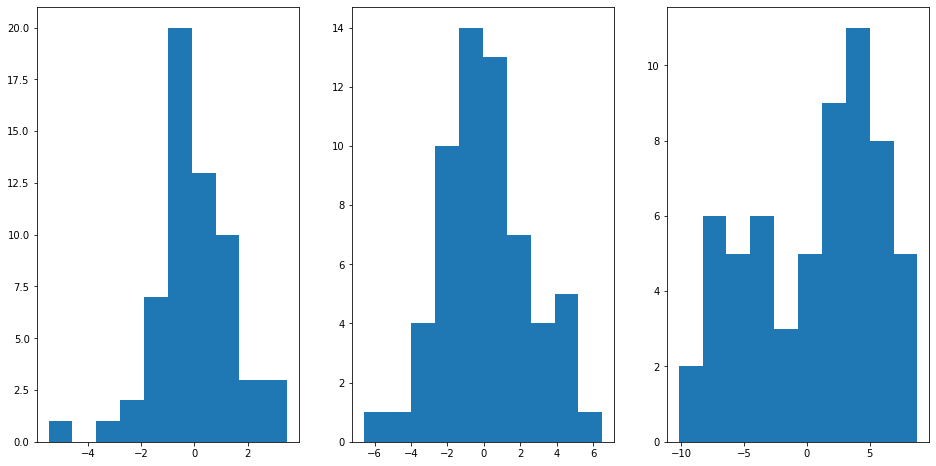

In [ ]:

feats = [
  ['TV', 'Radio'],
  ['TV', 'Newspaper'],
  ['Newspaper', 'Radio']
]
lm = []
fig, axs = plt.subplots(1,3)
fig.set_size_inches(16,8)
for i in range(X.shape[1]):
  print("Linear Model for variable #{}".format(i))
  xxtrain = xtrain.loc[:, feats[i]]
  xxtest = xtest.loc[:, feats[i]]

  lm.append(LinearRegression())
  lm[i].fit(xxtrain, ytrain)
  y_pred = lm[i].predict(xxtest)
  print(lm[i].intercept_, lm[i].coef_)
  print("MSE:", mean_squared_error(ytest,y_pred))
  print("STD:", sqrt(mean_squared_error(ytest,y_pred)))
  print("r2:", lm[i].score(xxtest, ytest))

  sqr_error = (ytest - y_pred)


  axs[i].hist(sqr_error)

  print()

# 8. prediction based on Test Dataset

4.63226201614081 [0.0549163  0.09294998 0.00974809]
MSE: 25.256637112033157
STD: 5.025598184498355
r2: 0.9119365079893469


(array([ 2.,  6.,  5.,  6.,  3.,  5.,  9., 11.,  8.,  5.]),
 array([-10.18214323,  -8.28309257,  -6.38404191,  -4.48499126,
         -2.5859406 ,  -0.68688994,   1.21216071,   3.11121137,
          5.01026203,   6.90931269,   8.80836334]),
 <a list of 10 Patch objects>)

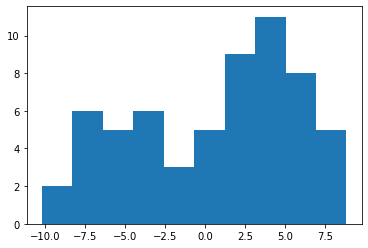

In [ ]:

lm=LinearRegression()
lm.fit(xtrain,ytrain)

# lets predict on test data
y_preds=lm.predict(xtest)


print(lm.intercept_, lm.coef_)
print("MSE:", mean_squared_error(ytest,y_pred))
print("STD:", sqrt(mean_squared_error(ytest,y_pred)))
print("r2:", lm.score(xtest, ytest))

plt.hist((ytest - y_pred))